# Weather Assignment

This jupyter notebook uses a city list generator based on random latitude and longitude coordinates and an iterative API call to generate city weather data. The code is outlined below with explanations of what each segment sets out to achieve. Finally the code generates four useful graphs from the dataset and three observable trends are derived from these. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
cities.index



<function list.index(value, start=0, stop=9223372036854775807, /)>

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

#generate lists to hold the information for data frame
temps = []
wind_speeds = []
humidity_per = []
cloudiness = []
lats = []
lons = []
cities2 = []

#generate for loop to iterate through the cities calling the api for each one
for city in cities:
    #use a try exception to ensure that if city data is not available for a specific city
    #that the loop with contiune without generate an error
    try:
        response = requests.get(base_url + city + "&appid=" + api_key + "&units=imperial")
        
        data = response.json()
        
    
        temp = data['main']['temp']
        clouds = data['clouds']['all']
        humidity = data['main']['humidity']
        wind_speed = data['wind']['speed']
        lat = data['coord']['lat']
        lon = data['coord']['lon']
        temps.append(temp)
        cloudiness.append(clouds)
        humidity_per.append(humidity)
        wind_speeds.append(wind_speed)
        lats.append(lat)
        lons.append(lon)
        cities2.append(city)
        print(f"Adding data for {city}. City number {len(lons)}.")

    except KeyError: 
        print("City not found.")
 #the for loop also prints out the number of cities that data has been collected for and the 
#number of missing data

Adding data for lavrentiya. City number 1.
Adding data for bluff. City number 2.
Adding data for mataura. City number 3.
Adding data for comodoro rivadavia. City number 4.
Adding data for talnakh. City number 5.
Adding data for rikitea. City number 6.
Adding data for albany. City number 7.
Adding data for yerbogachen. City number 8.
Adding data for nikolskoye. City number 9.
Adding data for urubicha. City number 10.
Adding data for hasaki. City number 11.
Adding data for bodden town. City number 12.
Adding data for avarua. City number 13.
Adding data for cherskiy. City number 14.
Adding data for dornbirn. City number 15.
City not found.
Adding data for puerto ayora. City number 16.
Adding data for kingsville. City number 17.
Adding data for bethel. City number 18.
Adding data for namibe. City number 19.
Adding data for busselton. City number 20.
Adding data for ushuaia. City number 21.
Adding data for mashhad. City number 22.
Adding data for sola. City number 23.
City not found.
Adding

Adding data for chernoistochinsk. City number 186.
Adding data for wlodawa. City number 187.
Adding data for porto walter. City number 188.
City not found.
Adding data for turukhansk. City number 189.
Adding data for kiruna. City number 190.
Adding data for airai. City number 191.
Adding data for rocha. City number 192.
Adding data for ribeira grande. City number 193.
Adding data for key largo. City number 194.
Adding data for poum. City number 195.
Adding data for pangoa. City number 196.
Adding data for sao joao da barra. City number 197.
Adding data for chokurdakh. City number 198.
Adding data for chapais. City number 199.
Adding data for alofi. City number 200.
Adding data for namie. City number 201.
Adding data for tubbergen. City number 202.
City not found.
Adding data for zwedru. City number 203.
Adding data for mattru. City number 204.
Adding data for abbeville. City number 205.
Adding data for shimoda. City number 206.
City not found.
Adding data for zaragoza. City number 207.

Adding data for te anau. City number 367.
Adding data for namatanai. City number 368.
Adding data for arrifes. City number 369.
Adding data for maloy. City number 370.
Adding data for kaeo. City number 371.
Adding data for nanortalik. City number 372.
Adding data for tabas. City number 373.
Adding data for cascais. City number 374.
Adding data for ukiah. City number 375.
Adding data for rabo de peixe. City number 376.
Adding data for churapcha. City number 377.
Adding data for tautira. City number 378.
Adding data for saint-pierre. City number 379.
Adding data for abu samrah. City number 380.
Adding data for coari. City number 381.
Adding data for kenora. City number 382.
Adding data for banda aceh. City number 383.
Adding data for manzanillo. City number 384.
Adding data for kavaratti. City number 385.
Adding data for cowra. City number 386.
Adding data for tiarei. City number 387.
Adding data for morrope. City number 388.
Adding data for tayud. City number 389.
Adding data for wiarto

In [5]:
#check the length of the cities2 list to make sure we have 500 unique information points
len(cities2)

549

In [6]:
#generate a dataframe from the lists of data derived from the API calls

city_data = pd.DataFrame({'City': cities2,
                          'Latitude': lats,
                          'Longitude': lons,
                          'Temperature': temps,
                          'Cloud Cover': cloudiness,
                          'Humidity': humidity_per,
                          'Wind Speed': wind_speeds})

#Show the data frame to check for errors
city_data.head()




,City,Latitude,Longitude,Temperature,Cloud Cover,Humidity,Wind Speed
0,lavrentiya,65.58,-170.99,4.49,0,79,21.39
1,bluff,-23.58,149.07,74.60,0,75,8.97
2,mataura,-46.19,168.86,59.66,64,77,8.75
3,comodoro rivadavia,-45.87,-67.48,71.60,75,15,20.80
4,talnakh,69.49,88.39,-0.74,76,76,19.71


In [7]:

#Save data frame as a csv file and output this to the repo
city_data.to_csv("city_data.csv",
                  encoding="utf-8", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

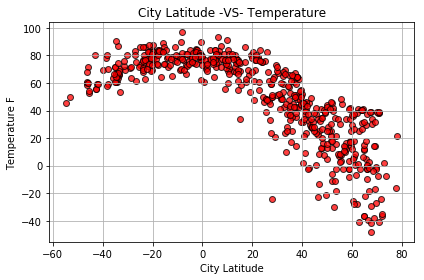

In [8]:
#generate scatter plot for Temperature information with labels and formatting also
#save this file as an outputted png file

plt.scatter(lats, temps, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title('City Latitude -VS- Temperature')
plt.xlabel('City Latitude')
plt.ylabel('Temperature F')
plt.grid() 
plt.tight_layout()
plt.savefig("City Latitude -VS- Temperature.png")

#### Latitude vs. Humidity Plot

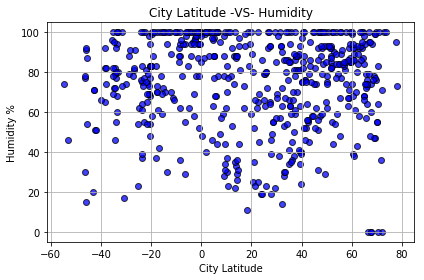

In [9]:
#generate scatter plot for % Humidity information with labels and formatting also
#save this file as an outputted png file

plt.scatter(lats, humidity_per, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title('City Latitude -VS- Humidity')
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
plt.grid() 
plt.tight_layout()
plt.savefig("City Latitude -VS- Humidity.png")

#### Latitude vs. Cloudiness Plot

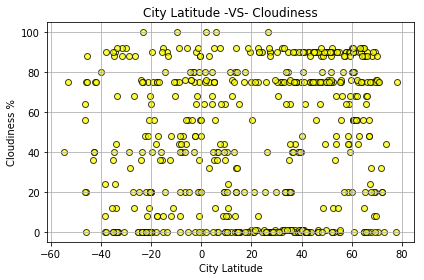

In [10]:
#generate scatter plot for % Cloudiness information with labels and formatting also
#save this file as an outputted png file

plt.scatter(lats, cloudiness, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75)
plt.title('City Latitude -VS- Cloudiness')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness %')
plt.grid() 
plt.tight_layout()
plt.savefig("City Latitude -VS- Cloudiness.png")

#### Latitude vs. Wind Speed Plot

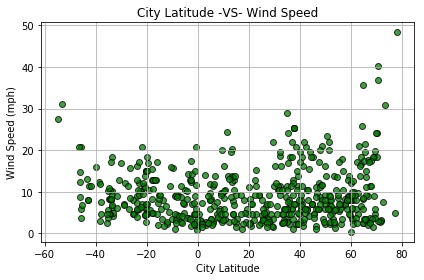

In [11]:
#generate scatter plot for Wind Speed information with labels and formatting also
#save this file as an outputted png file

plt.scatter(lats, wind_speeds, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title('City Latitude -VS- Wind Speed')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid() 
plt.tight_layout()
plt.savefig("City Latitude -VS- Wind Speed.png")

Observable Trends:

1. The highest temperatures are observed nearer to the equator. There is also a skew of temperatures towards an increasing as the latitude moves towards the south pole. This is due to the fact that the weather information was obtained during winter in the Northern Hemisphere. 
2. There appears to be a trend towards increased cloudiness the further north the data is collected. This may also be due to the tilt of the earth generating seasons.
3. There is no apparent correlation between the latitude and humidity. 